In [92]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

import math


In [3]:
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

#Show img
def plot_img(img,size=(8,8)):
    plt.figure(figsize=size)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

img_path_1="./image/EpiscopalGaudi/3743214471_1b5bbfda98_o.jpg"
img_path_2="./image/EpiscopalGaudi/4386465943_8cf9776378_o.jpg"
img_path_3="./image/MountRushmore/9021235130_7c2acd9554_o.jpg"



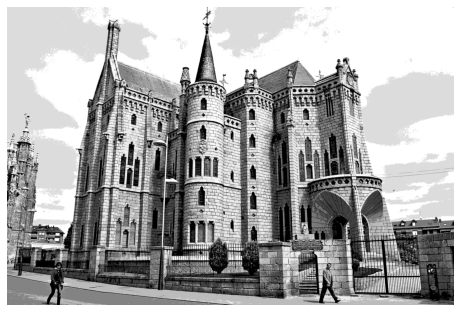

In [44]:
img1=cv2.cvtColor(cv2.imread(img_path_1), cv2.COLOR_BGR2RGB) 
img2=cv2.cvtColor(cv2.imread(img_path_2), cv2.COLOR_BGR2RGB) 
img3=cv2.cvtColor(cv2.imread(img_path_3), cv2.COLOR_BGR2RGB) 
img1=img1
img1=quantimage(img1,8)
img1_luv=cv2.cvtColor(np.array(img1).astype('float32')/255, cv2.COLOR_RGB2Luv)
img1_gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plot_img(img1_gray,(8,8))

In [100]:
def get_CECH(image):
    img1=quantimage(image,8)
    #Xám hóa
    img1_gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    d=5
    
    h,w,c=img1.shape
    pixels = [(*pixel,) for pixel in img1.reshape(-1, 3)]
    color_list=Counter(pixels)
    # img1_pad=np.pad(img1, ((1,1), (1,1),(0,0)), constant_values=0)
    img1_gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    #Sobel
    sobelx = cv2.Sobel(img1_gray,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img1_gray,cv2.CV_64F,0,1,ksize=5)
        
    e=np.zeros((h,w))
    gradient_f=np.zeros((h,w))
    theta=np.zeros((h,w))
    list_value=[]

    px_1=np.zeros((h,w))
    px_2=np.zeros((h,w))
    py_1=np.zeros((h,w))
    py_2=np.zeros((h,w))
    

    cout_neg=0
    for i in range(h):
        for j in range(w):
            gradient_f[i][j]=math.sqrt(sobelx[i,j]**2+sobely[i,j]**2)
            theta[i][j]=math.atan(sobely[i,j]/(sobelx[i,j]+0.1))

            if gradient_f[i][j]>1000:
                e[i][j]=1
                x1= i - d* math.cos(theta[i][j])
                y1= j + d*math.sin(theta[i][j])
                
                px_1[i][j]=int(x1)
                py_1[i][j]=int(y1)
                x2= i + d* math.cos(theta[i][j])
                y2= j - d*math.sin(theta[i][j])
                px_2[i][j]=int(x2)
                py_2[i][j]=int(y2)
                if x1 <0 or y1 <0 or int(x1) >=h or int(y1) >=w:
                    px_1[i][j]=int(i)
                    py_1[i][j]=int(j)
                    cout_neg+=1
                    
                if x2 <0 or y2 <0 or int(x2) >=h or int(y2) >=w:
                    px_2[i][j]=int(i)
                    py_2[i][j]=int(j)
                    cout_neg+=1
            else:
                e[i][j]=0
            
    CECH={}

    for key1 in color_list.keys():
        for key2 in color_list.keys():
            CECH[key1,key2]=0

        
    for i in range(h):
        for j in range(w):
            if e[i][j]==1:
                color_1=img1[int(px_1[i][j])][int(py_1[i][j])]
                color_2=img1[int(px_2[i][j])][int(py_2[i][j])]

                CECH[(color_1[0],color_1[1],color_1[2]),(color_2[0],color_2[1],color_2[2])]+=1
    
    return CECH
    x= [key for key in CECH.keys()]
    y= [CECH[t] for t in x]
    x= [str(key) for key in CECH.keys()]

def color_distance(x1,x2):
    distance=math.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2+(x1[2]-x2[2])**2)
    return distance
    



In [95]:
CECH1=get_CECH(img1)
CECH2=get_CECH(img2)

In [107]:
keys1=[key for key in CECH1.keys()]
keys2=[key for key in CECH2.keys()]

for key1 in keys1:
    for key2 in keys2:
        print(key1)
        ci=key1[0]
        cj=key1[1]

        ck=key2[0]
        cl=key2[1]

        d1=color_distance(ci,ck)
        d2=color_distance(cj,cl)
        dC = max(d1,d2)
        break
    break

((174, 192, 222), (174, 192, 222))


/tmp/ipykernel_1341387/1870385808.py:77: RuntimeWarning: overflow encountered in ubyte_scalars
  distance=math.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2+(x1[2]-x2[2])**2)


In [69]:
sobelx.shape

(1801, 2701)

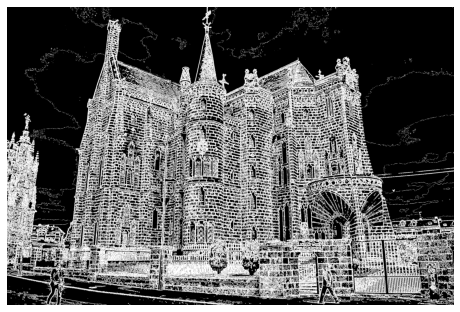

In [73]:
img1_gray.shape

(1801, 2701)

In [74]:
max([py_2[i][j] for i in range(len(py_1)) for j in range(len(py_1[0]))])

2700.0

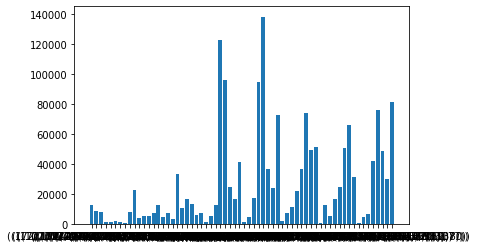

In [9]:
px_1=np.zeros((h,w))
px_2=np.zeros((h,w))
py_1=np.zeros((h,w))
py_2=np.zeros((h,w))
d=15
for i in range(len(e)):
    for j in range(len(e[0])):
        
        x1= i - d* math.cos(theta[i][j])
        y1= j + d*math.sin(theta[i][j])
        px_1[i][j]=x1
        py_1[i][j]=y1
        x2= i + d* math.cos(theta[i][j])
        y2= j - d*math.sin(theta[i][j])
        px_2[i][j]=x2
        py_2[i][j]=y2

    #     break
    # break


In [96]:
def get_gradient(image,x,y):
  h,w=image.shape
  A_x_y=image[x-1:x+2,y-1:y+2]
  H_x=[[1, 0,-1],[2, 0,-2],[1, 0,-1]]
  H_y=[[1, 2, 1],[0, 0, 0],[-1,-2,-1]]
  print(H_x*A_x_y)

  return


get_gradient(img1_gray,1,1)

[[   0    0    0]
 [   0    0 -380]
 [   0    0 -190]]


In [64]:
img1[0:2,0:2]

array([[[172, 194, 221],
        [172, 194, 221]],

       [[172, 194, 221],
        [172, 194, 221]]], dtype=uint8)

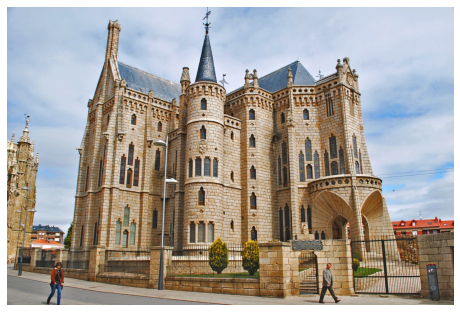

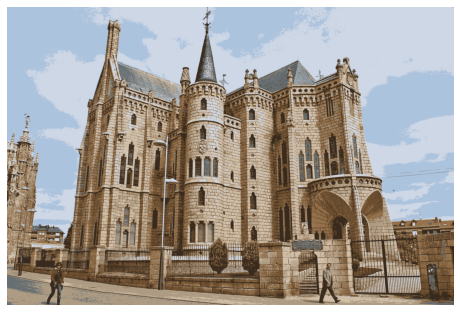

In [16]:

plot_img(img1)
plot_img(new_image)